Test gradient-free Stein thinning for a simple bivariate Gaussian sample.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn
from stein_thinning.thinning import thin

from stein_thinning.thinning import thin, thin_gf

In [2]:
rng = np.random.default_rng(12345)

Obtain a sample from a bivariate Gaussian distribution

In [3]:
means = np.array([0., 0.])
covs = np.array([
    [1., 0.8],
    [0.8, 1.],
])

In [4]:
n = 1000
m = 20

In [5]:
sample = mvn.rvs(mean=means, cov=covs, size=n, random_state=rng)
gradient = np.einsum('kj,ij->ik', np.linalg.inv(covs), means - sample)

Use the standard Stein thinning

In [6]:
idx = thin(sample, gradient, m)
idx

array([164,  60, 859, 821,  66, 870, 327, 885, 677, 944, 111, 601, 950,
       249, 584, 795, 174, 317, 792, 637], dtype=uint32)

In [7]:
def plot_thinned(ax, sample, idx):
    ax.scatter(sample[:, 0], sample[:, 1], color='lightgray');
    ax.scatter(sample[idx, 0], sample[idx, 1], color='red');

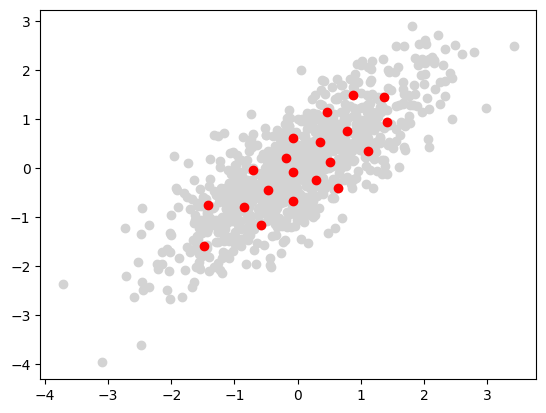

In [8]:
fig, ax = plt.subplots();
plot_thinned(ax, sample, idx)

Confirm that the gradient-free thinning is equivalent to standard thinning if the true distribution is used as the proxy

In [9]:
log_p = mvn.logpdf(sample, mean=means, cov=covs)

In [10]:
idx2 = thin_gf(sample, log_p, log_p, gradient, m)

In [11]:
np.testing.assert_array_equal(idx2, idx)

Construct a simple bivariate Gaussian proxy based on the sample mean and covariance

In [12]:
sample_mean = np.mean(sample, axis=0)
sample_cov = np.cov(sample, rowvar=False, ddof=means.shape[0])

In [13]:
sample_mean

array([-0.01905537,  0.00423809])

In [14]:
sample_cov

array([[1.00976763, 0.78753313],
       [0.78753313, 0.9879006 ]])

In [15]:
log_q = mvn.logpdf(sample, mean=sample_mean, cov=sample_cov)
gradient_q = np.einsum('kj,ij->ik', np.linalg.inv(sample_cov), sample_mean - sample)

Compare the results of thinning vs the standard thinning algorithm

In [16]:
idx3 = thin_gf(sample, log_p, log_q, gradient_q, m)
idx3

array([302, 995, 914, 931, 889, 918,  65, 714, 885,  46, 601,  88, 111,
        16, 478, 462, 750,  79, 783, 739], dtype=uint32)

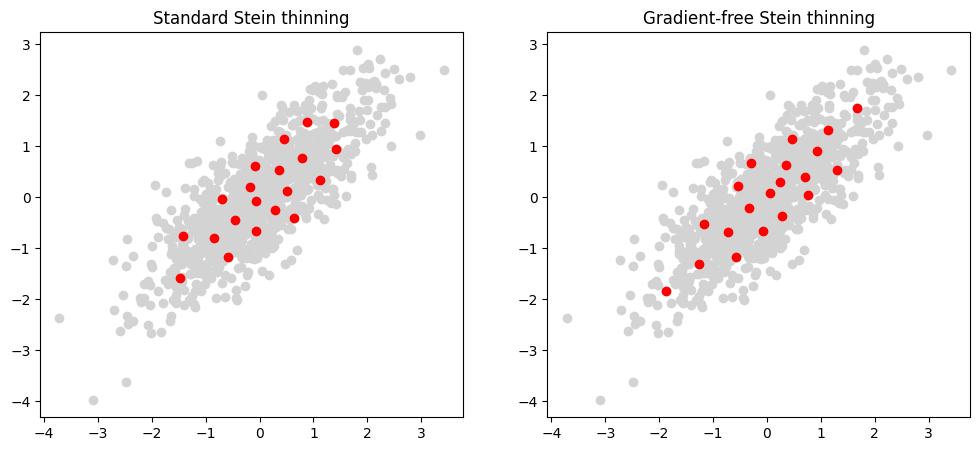

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5));
plot_thinned(axs[0], sample, idx);
axs[0].set_title('Standard Stein thinning');
plot_thinned(axs[1], sample, idx3);
axs[1].set_title('Gradient-free Stein thinning');